[-0.5   -0.526 -0.556 -0.588 -0.625 -0.667 -0.714 -0.769 -0.833 -0.909
 -1.   ]
[-0.5   -0.526 -0.555 -0.588 -0.625 -0.667 -0.714 -0.769 -0.834 -0.909
 -1.   ]


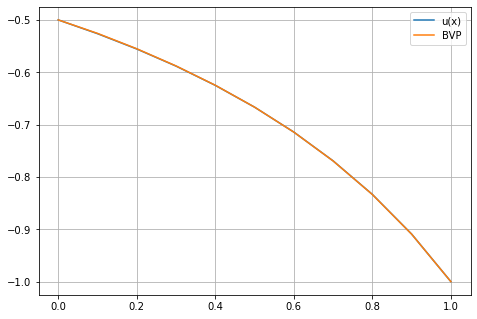

In [51]:
from matplotlib import pyplot as plt
from math import sin, atan, cos

N = 10
n = N + 1
h = 1 / N
x = [i * h for i in range(n)]

p = lambda x: 2 / (x - 2)
q = lambda x: x - 2
f = [1] * n
res = lambda x: 1 / (x - 2)

alpha0, alpha1 = 1, 1
beta0, beta1 = 0, 0
gamma0, gamma1 = -0.5, -1

r = lambda x: p(x) * h / 2
a = [(1 + r(x_) * sin(r(x_)) - r(x_)) / h**2 for x_ in x]
c = [(1 + r(x_) * sin(r(x_)) + r(x_)) / h**2 for x_ in x]

a[0] = 0
c[N] = 0

b = [q(x[i]) - a[i] - c[i] for i in range(n)]
b[0] = -102.3

def solve(A, B, C, F, n, u0, uN):
    alpha, beta = [0] * n, [0] * n
    alpha[0] = -C[0] / B[0]
    beta[0]  =  F[0] / B[0]

    for k in range(1, n):
        alpha[k] = -C[k] / (B[k] + A[k] * alpha[k - 1]) 
        beta[k]  = (F[k] - A[k] * beta[k - 1]) / (B[k] + A[k] * alpha[k - 1])

    U = [0 for k in range(n)]
    U[N] = uN
    U[0] = u0

    for k in range(n - 2, 0, -1):
        U[k] = alpha[k] * U[k + 1] + beta[k]

    return U

u = solve(a, b, c, f, n, gamma0 / alpha0, gamma1 / alpha1)
import numpy
numpy.set_printoptions(precision=3, suppress=True)
print(numpy.array([res(x_) for x_ in x]))
print(numpy.array(u))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, [res(x_) for x_ in x], label='u(x)')
ax.plot(x, u, label='BVP')
ax.legend()
plt.grid()
plt.show()